# Sentiment Analysis

Total reviews: 99224
Reviews with customer data: 96360
sentiment      Negative  Neutral  Positive  Very Negative  Very Positive
customer_tier                                                           
High Value           94      230       518            411           1701
Low Value          2273     6413     15369           6921          45913
Medium Value        532     1257      2897           1900           8837
VIP                  42       61       203            173            615


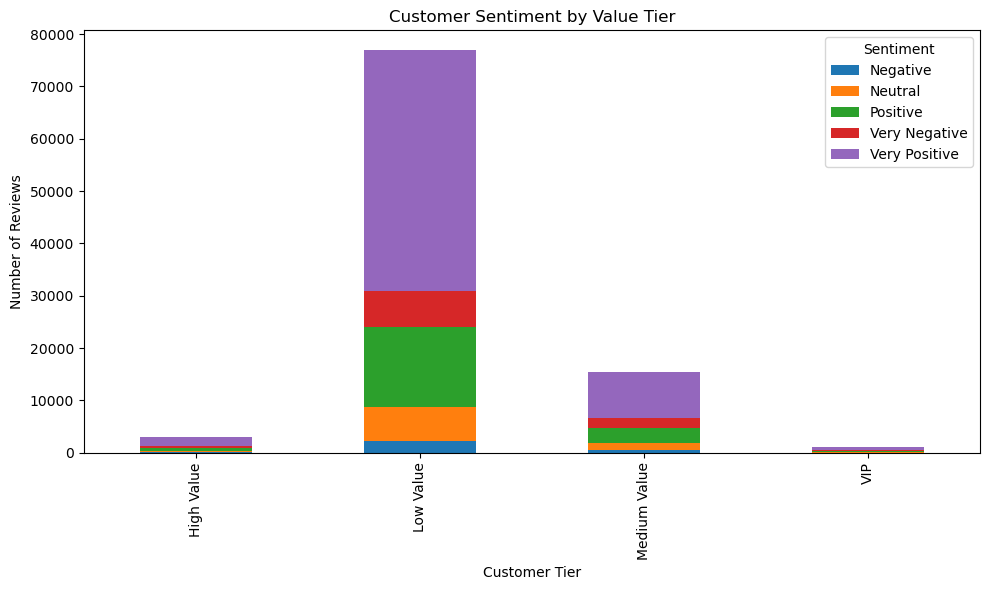


Average Review Score by Customer Tier:
customer_tier
Low Value       4.184565
Medium Value    4.052908
High Value      4.016926
VIP             3.955210
Name: review_score, dtype: float64

=== WHY 0% REPEAT RATE? ===
Overall Avg Review Score: 4.16/5.0
% Positive Reviews (4-5 stars): 78.9%
% Negative Reviews (1-2 stars): 12.8%


In [1]:
# 1. SETUP (2 min)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. LOAD DATA (3 min)
# Load the reviews CSV that wouldn't import to MySQL
reviews = pd.read_csv('/Users/reynoldtakurachoruma/Desktop/Customer Economics/olist_order_reviews_dataset.csv', encoding='latin1')

# Load your mapping file
orders = pd.read_csv('/Users/reynoldtakurachoruma/Desktop/Customer Economics/order_customer_mapping.csv')

# 3. JOIN DATA (2 min)
data = reviews.merge(orders, on='order_id', how='inner')

print(f"Total reviews: {len(reviews)}")
print(f"Reviews with customer data: {len(data)}")

# 4. BASIC SENTIMENT (5 min)
# Review scores ARE sentiment (1-5 stars)
data['sentiment'] = data['review_score'].map({
    5: 'Very Positive',
    4: 'Positive', 
    3: 'Neutral',
    2: 'Negative',
    1: 'Very Negative'
})

# 5. ANALYSIS BY TIER (8 min)
tier_sentiment = data.groupby(['customer_tier', 'sentiment']).size().unstack(fill_value=0)
print(tier_sentiment)

# Plot
tier_sentiment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Customer Sentiment by Value Tier')
plt.ylabel('Number of Reviews')
plt.xlabel('Customer Tier')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# 6. KEY INSIGHT (5 min)
avg_score_by_tier = data.groupby('customer_tier')['review_score'].mean().sort_values(ascending=False)
print("\nAverage Review Score by Customer Tier:")
print(avg_score_by_tier)

# 7. ANSWER THE QUESTION (5 min)
print("\n=== WHY 0% REPEAT RATE? ===")
print(f"Overall Avg Review Score: {data['review_score'].mean():.2f}/5.0")
print(f"% Positive Reviews (4-5 stars): {(data['review_score'] >= 4).sum() / len(data) * 100:.1f}%")
print(f"% Negative Reviews (1-2 stars): {(data['review_score'] <= 2).sum() / len(data) * 100:.1f}%")


# Sentiment report for one time vs repeat 

In [7]:
seg_sentiment = (data
    .groupby(['is_one_time', 'sentiment'])
    .size()
    .unstack(fill_value=0)
)
print("\nSentiment by one-time vs repeat:")
print(seg_sentiment)

seg_score = data.groupby('is_one_time')['review_score'].mean()
print("\nAverage review score:")
print(seg_score)



Sentiment by one-time vs repeat:
sentiment    Negative  Neutral  Positive  Very Negative  Very Positive
is_one_time                                                           
False             615     1138      2051           2269           6123
True             2326     6823     16936           7136          50943

Average review score:
is_one_time
False    3.749754
True     4.214581
Name: review_score, dtype: float64
